In [1]:
#Import of numpy array and matplotlib to plot the graph
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#importing file 
data_train = pd.read_table("train-data.txt",delim_whitespace=True,header=None)
data_test = pd.read_table("test-data.txt",delim_whitespace=True,header=None)
print(data_train.shape)

# #checking for any missung values in the data frame
# print((sum(data_train.isnull().sum())))
# print((sum(data_test.isnull().sum())))

#Created a separate dataframe for labels of training data 
train_data_label=data_train[1]


#Converted the train labels from dataframe to array
train_data_label=train_data_label.values

#Dropping the columns of labels from train data
data_train.drop(0,axis=1,inplace=True)
data_train.drop(1,axis=1,inplace=True)


#created a separate dataframe for labels in test data
test_data_label=data_test[1]
print(test_data_label.shape)

#converted the test labels from dataframe to array
test_data_label=test_data_label.values

#Dropping the columns of lables from test data
data_test.drop(0,axis=1,inplace=True)
data_test.drop(1,axis=1,inplace=True)


#converting train and test data without labels to array
data_train=data_train.values
data_test=data_test.values

(36976, 194)
0
0
(943,)


In [2]:
# Function for Euclidean distance calculation

def distance(x,y):   
    return np.sqrt(np.sum((x-y)**2))
        

In [3]:
# function to find nearest neighbours
import operator
def knn(test_data,train_data,k):
    dist=[]                        #dist- is a list which conatins neighbours(index) and its corresponding distances from the test data
    length=len(train_data)
    for j in range(length):
        d=distance(train_data[j],test_data)
        dist.append((j,d))
    dist.sort(key=operator.itemgetter(1))
    neighbours=[]
    for x in range(k):
        neighbours.append(dist[x][0])
    return neighbours

knn(data_test[0], data_train,5)
    

[19484, 36800, 33048, 21660, 7564]

In [4]:
#function to find the mode of the labels of the nearest neighbours
import statistics
def find_max_mode(list_data):
    list_table = statistics._counts(list_data)
    len_table = len(list_table)

    if len_table == 1:
        max_mode = statistics.mode(list_data)
    else:
        new_list = []
        for i in range(len_table):
            new_list.append(list_table[i][0])
        max_mode = max(new_list) 
    return max_mode

In [5]:
#Function to find predictions of test data by K-NN model
#k - Number of nearest neighbours 
#a - Input Train_data
#b - Test data
#train_label 
def prediction(a,b,train_label, k):
    predictions = []
    for i in range(len(b)):
        neigh=knn(b[i],a,k)
        n_labels = []                                    #n_labels is a list which contains labels of the predicted neighbours
        n_labels = train_label[neigh]
        predictions.append(find_max_mode(n_labels))
        #print(find_max_mode(n_labels))    #voting on the correct orientation
    return predictions
        
        

In [6]:
#Function to find Accuracy 
#Accuracy was found by comparing the predicted value by model and actual value on the test data
def accuracy(predicted,actual):
        count1=0
        for i in range(len(predicted)):
            if predicted[i]==actual[i]:
                count1+=1
            accuracy1=count1/len(predicted)
        return(accuracy1)

#acc=accuracy(predicted,test_data_label)
#print(acc)

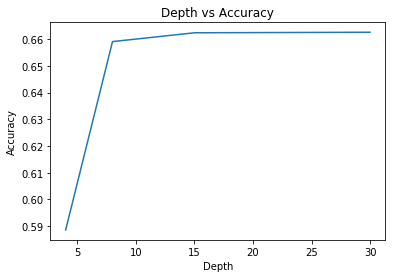

In [2]:
import time
k_value=[]  
# time2=[]      
# for k in range(5,42,4):
#     starttime=time.time()
#     predicted=prediction(data_train,data_test, train_data_label, k) 
#     totaltime=time.time()-starttime
#     time2.append(totaltime)
#     k_value.append(k)
# print(k_value)
# print(time2)
Depth=[4,8,15,30]
Accuracy=[0.5886,0.6591,0.6624,0.6626]
import matplotlib.pyplot as plt
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.plot(Depth,Accuracy)
plt.title("Depth vs Accuracy")
plt.show()

In [8]:
p = prediction(data_train,data_test, train_data_label,41)
print(p)

[0, 0, 180, 270, 0, 0, 0, 90, 90, 180]


In [8]:
#Plot graph for K(number of neraest neighbours) vs Accuracy 
print(test_data_label[1:10])
labels=pd.read_csv("test-data.txt",delim_whitespace=True,header=None).iloc[:,1]
# k_val = []
# acc = []
# pred1=[]
# Misclassified=[]
# classified=[]
# p = prediction(data_train,data_test, train_data_label,41)
# for i in range(20):
#     if p[i]==test_data_label[i]:
#         classified.append(labels[i])
#     else:
#         Misclassified.append(labels[i])

# print(classified)
# print(Misclassified)

[  0 180 270   0  90   0  90  90 270]
['test/10008707066.jpg', 'test/10099910984.jpg', 'test/10107730656.jpg', 'test/10161556064.jpg', 'test/10164298814.jpg', 'test/102461489.jpg', 'test/10304005245.jpg', 'test/10313218445.jpg', 'test/10353444674.jpg', 'test/10684428096.jpg', 'test/1074374765.jpg', 'test/10795283303.jpg', 'test/10814107565.jpg', 'test/10931472764.jpg']
['test/10196604813.jpg', 'test/10351347465.jpg', 'test/10352491496.jpg', 'test/10484444553.jpg', 'test/10577249185.jpg', 'test/108172840.jpg']


[2311, 6933, 11555, 16177, 20799, 25421, 30043, 34665]
[0.6818663838812301, 0.6998939554612937, 0.7073170731707317, 0.6967126193001061, 0.6935312831389183, 0.6988335100742312, 0.6988335100742312, 0.711558854718982]
[15.907667875289917, 48.200096130371094, 81.05984258651733, 114.3927230834961, 147.56714153289795, 180.90625643730164, 214.36259841918945, 247.00882172584534]


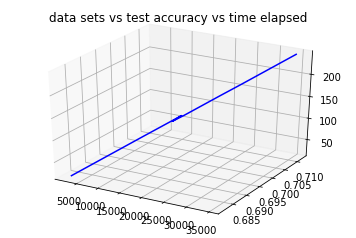

In [8]:

# from mpl_toolkits.mplot3d import Axes3D
# import time
# #calculation of performance for different data set
# pre=[]
# acc1=[]
# time1=[]
# data=[]
# for i in range(2311,(len(data_train))+1,4622):
#     starttime=time.time()        
#     predicted=prediction(data_train[:i,:],data_test, train_data_label, 41) 
#     pre.append(predicted)
#     totaltime=time.time()-starttime
#     time1.append(totaltime)
#     acc=accuracy(predicted,test_data_label)
#     acc1.append(acc)
#     data.append(i)
# print(data)
# print(acc1)
# print(time1)

# #plot of performance of model 

# fig=plt.figure()
# ax=fig.add_subplot(111,projection="3d")

# Axes3D.plot3D(ax,xs=data,ys=acc1,zs=time1,color="b")
# plt.title("data sets vs test accuracy vs time elapsed")
# plt.show()